In [61]:
import numpy as np

## Set Parameter

In [62]:
x = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])
print(len(x))
print(x)
y = np.array([0, 1, 1, 1, 2, 2, 2, 3, 3, 3])
print(y)
z = np.array([0, 1, 2, 3, 1, 2, 3, 1, 2, 3])
print(z)

f = np.array([8, 15, 19, 23, 17, 21, 25, 19, 23, 27])
print(f)

value = 1 
bias = np.full(len(x), value)
print(bias)

10
[0 1 1 1 1 1 1 1 1 1]
[0 1 1 1 2 2 2 3 3 3]
[0 1 2 3 1 2 3 1 2 3]
[ 8 15 19 23 17 21 25 19 23 27]
[1 1 1 1 1 1 1 1 1 1]


## Set New column Stack

In [63]:
new_column_stack = np.column_stack((x, y, z, bias))

print(len(new_column_stack))

print(new_column_stack)

10
[[0 0 0 1]
 [1 1 1 1]
 [1 1 2 1]
 [1 1 3 1]
 [1 2 1 1]
 [1 2 2 1]
 [1 2 3 1]
 [1 3 1 1]
 [1 3 2 1]
 [1 3 3 1]]


## Func to cal parameter c

In [64]:
def cal_c_value(y):
    c = 1/len(y)*(sum(y**2))
    return c

## Func to cal parameter h

In [65]:
def cal_h_value(y,new_column_stack):
    a = 0
    h = 0
    for i in range(len(y)):
        a = a + y[i]*new_column_stack[i]
        
    h = (1/len(y))*a
        
    return h

## Func to cal parameter R

In [66]:
def cal_R_value(new_column_stack):
    a = np.zeros((len(new_column_stack[0]), len(new_column_stack[0])))  # Initialize a zero matrix of the correct size
    R = np.zeros((len(new_column_stack[0]), len(new_column_stack[0])))  # Initialize R as a zero matrix

    for i in range(len(new_column_stack)):
        a += np.outer(new_column_stack[i], new_column_stack[i])  # Compute the outer product and add it to 'a'
    
    R = (1/len(new_column_stack))*a
    
    return R

## Func to cal parameter a ... an

In [67]:
def cal_a_value(R, h):
    a = np.dot(np.linalg.inv(R), h)  # Matrix multiplication between R and h
    return a

In [68]:
c = np.round(cal_c_value(f), 2)
print(f"c : {c}")
# print(c)

h = np.round(cal_h_value(f, new_column_stack), 2)
print(f"h : {h}")
# print(h)

R = np.round(cal_R_value(new_column_stack), 2)
print("R :")
print(R)

a = np.round(cal_a_value(R, h), 2)
print("a :")
print(a)

c : 415.3
h : [18.9 39.  40.2 19.7]
R :
[[0.9 1.8 1.8 0.9]
 [1.8 4.2 3.6 1.8]
 [1.8 3.6 4.2 1.8]
 [0.9 1.8 1.8 1. ]]
a :
[1. 2. 4. 8.]


## quadratic parameter set parameter

In [69]:
learning_rate = np.array([0.05])

a_test = np.array([0, 0, 0, 0]) # a start parameter 

quad_column_stack = np.column_stack((x, y, z, f)) # sort quadratic
print(quad_column_stack)

print(quad_column_stack[0])
print(new_column_stack[0])

[[ 0  0  0  8]
 [ 1  1  1 15]
 [ 1  1  2 19]
 [ 1  1  3 23]
 [ 1  2  1 17]
 [ 1  2  2 21]
 [ 1  2  3 25]
 [ 1  3  1 19]
 [ 1  3  2 23]
 [ 1  3  3 27]]
[0 0 0 8]
[0 0 0 1]


In [70]:
print(a_test)
print(new_column_stack[0])

e = f[0]- (np.dot(a_test, new_column_stack[0]))
print(e)

w11 = a_test + 2 * learning_rate * np.dot(e, new_column_stack[0])

print(w11)


[0 0 0 0]
[0 0 0 1]
8
[0.  0.  0.  0.8]


In [71]:
for i in range(len(f)):
    print(f"---------- ITERATION {i+1} ----------")
    print(f"present : {quad_column_stack[i]}")
    e = np.round(f[i]- (np.dot(a_test, new_column_stack[i])), 3)
    print(f"when f {f[i]} :")
    print(f"f = {np.dot(a_test.T, new_column_stack[i])}")
    w = np.round(a_test + 2 * learning_rate * np.dot(e, new_column_stack[i]), 3)
    
    a_test = w
    
    
    print(f"error {i+1} (when f = {f[i]}): {e}")
    print(f"weight {i+1} : ")
    print(w)

---------- ITERATION 1 ----------
present : [0 0 0 8]
when f 8 :
f = 0
error 1 (when f = 8): 8
weight 1 : 
[0.  0.  0.  0.8]
---------- ITERATION 2 ----------
present : [ 1  1  1 15]
when f 15 :
f = 0.8
error 2 (when f = 15): 14.2
weight 2 : 
[1.42 1.42 1.42 2.22]
---------- ITERATION 3 ----------
present : [ 1  1  2 19]
when f 19 :
f = 7.9
error 3 (when f = 19): 11.1
weight 3 : 
[2.53 2.53 3.64 3.33]
---------- ITERATION 4 ----------
present : [ 1  1  3 23]
when f 23 :
f = 19.31
error 4 (when f = 23): 3.69
weight 4 : 
[2.899 2.899 4.747 3.699]
---------- ITERATION 5 ----------
present : [ 1  2  1 17]
when f 17 :
f = 17.143
error 5 (when f = 17): -0.143
weight 5 : 
[2.885 2.87  4.733 3.685]
---------- ITERATION 6 ----------
present : [ 1  2  2 21]
when f 21 :
f = 21.776
error 6 (when f = 21): -0.776
weight 6 : 
[2.807 2.715 4.578 3.607]
---------- ITERATION 7 ----------
present : [ 1  2  3 25]
when f 25 :
f = 25.578
error 7 (when f = 25): -0.578
weight 7 : 
[2.749 2.599 4.405 3.549]
--

## MPL 

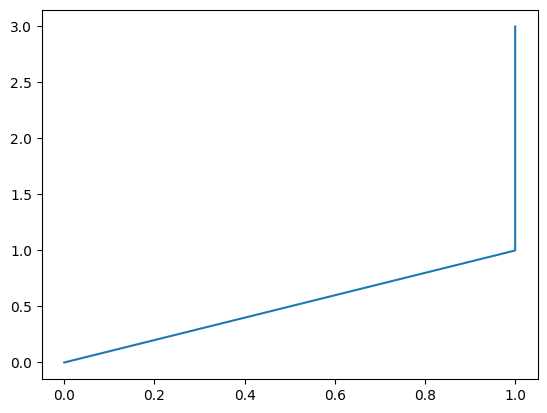

In [72]:
import matplotlib.pyplot as plt

plt.plot(x, y)

In [73]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(sigmoid(-1))

0.2689414213699951
